# 0. Imports

In [10]:
from pathlib import Path
import pickle

import jax.numpy as jnp
import jax.random as jr
import matplotlib.pyplot as plt
import pandas as pd

In [11]:
%load_ext autoreload
%autoreload 2

%config InlineBackend.figure_format = "retina"

# 1. Stationary Classification - Fashion MNIST

## 1.1 Method Comparison

MLP with layers (500, 500, 10). Tune hyperparameters wrt average validation set LL over the first 500 training examples. Test-set (10,000 examples) evaluation over 100 random initializations.

In [19]:
methods_st = {
    'sgd-rb-1-sgd': ('OGD', 'red'),
    # 'sgd-rb-5-sgd': ('SGD-5', 'gold'),
    'sgd-rb-10-sgd': ('SGD-10', 'darkorange'),
    
    # 'sgd-rb-1-adam': ('Adam-1', 'olivedrab'),
    # 'sgd-rb-5-adam': ('Adam-5', 'darkgreen'),
    'sgd-rb-10-adam': ('Adam-10', 'teal'),
    
    'fdekf': ('FDEKF', 'black'),
    'vdekf': ('VDEKF', 'lightgray'),
    
    # 'lofi-5-diagonal': ('LOFI-5', 'aqua'),
    'lofi-10-diagonal': ('LOFI-10', 'blue'),
    # 'lofi-5-spherical': ('LOFI-SPH-5', 'deepskyblue'),
    # 'lofi-10-spherical': ('LOFI-SPH-10', 'blueviolet'),
}

n_iter = 100

In [20]:
path_st = Path(Path.cwd(), "output", "stationary")

results_miscl_st, results_nll_st = {}, {}

for method in methods_st:
    with open(Path(path_st, f'{method}_miscl.pkl'), "rb") as f:
        curr_miscl = pickle.load(f)
    with open(Path(path_st, f'{method}_nll.pkl'), "rb") as f:
        curr_nll = pickle.load(f)
    results_miscl_st[method] = curr_miscl
    results_nll_st[method] = curr_nll

Misclassification Rate

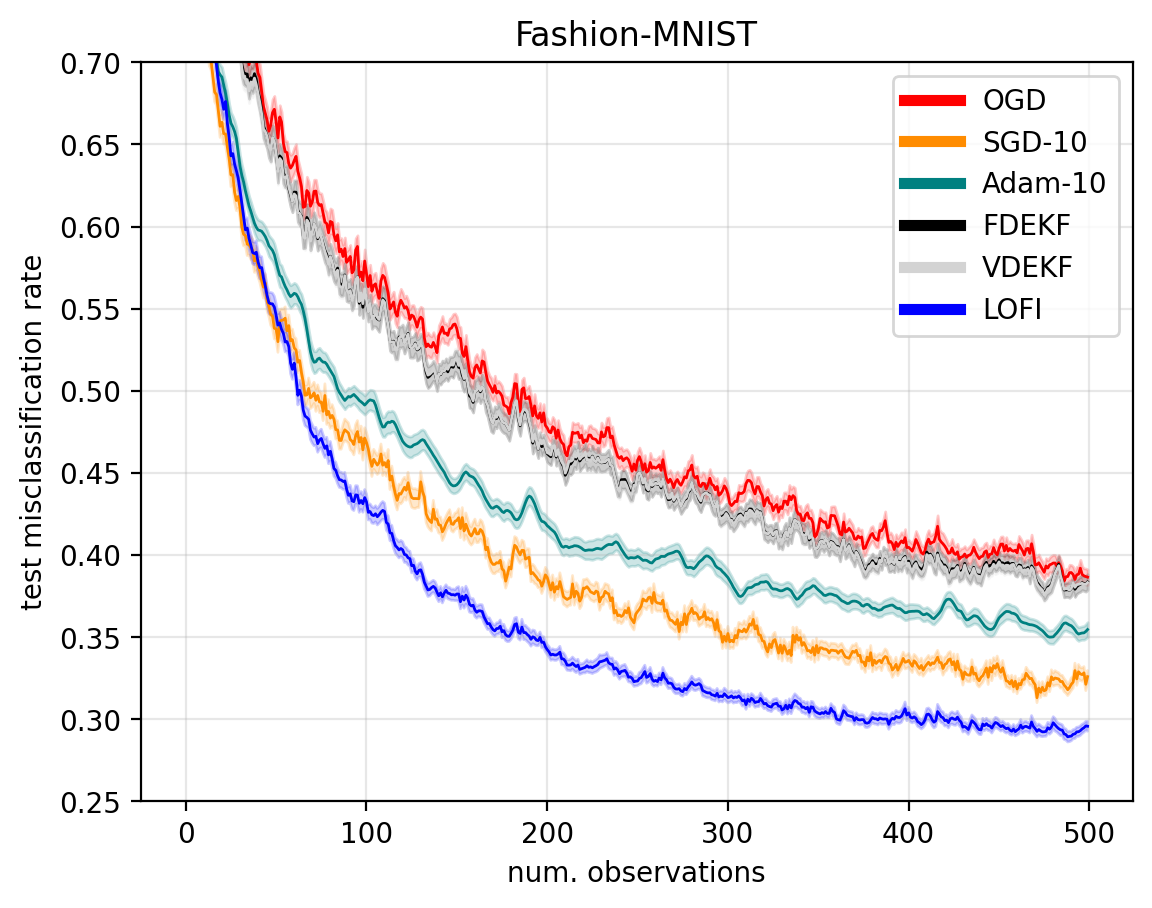

In [21]:
fig, ax = plt.subplots()
for key, val in results_miscl_st.items():
    mean, std = val['mean'], val['std']
    label, color = methods_st[key]
    ax.plot(mean, label=label, c=color, linewidth=1.0)
    ax.fill_between(
        jnp.arange(mean.shape[0]),
        mean - std / jnp.sqrt(n_iter),
        mean + std / jnp.sqrt(n_iter),
        alpha=0.2,
        color=color
    )
ax.set_xlabel('num. observations')
ax.set_ylabel('test misclassification rate')
ax.set_ylim(0.25, 0.7)
ax.grid(alpha=0.3)
ax.set_title('Fashion-MNIST')
leg = ax.legend()
# change the line width for the legend
for line in leg.get_lines():
    line.set_linewidth(4.0)

fig.savefig(Path(path_st, 'stationary-mnist-clf-test-miscl.pdf'), bbox_inches='tight')

Negative Log Likelihood

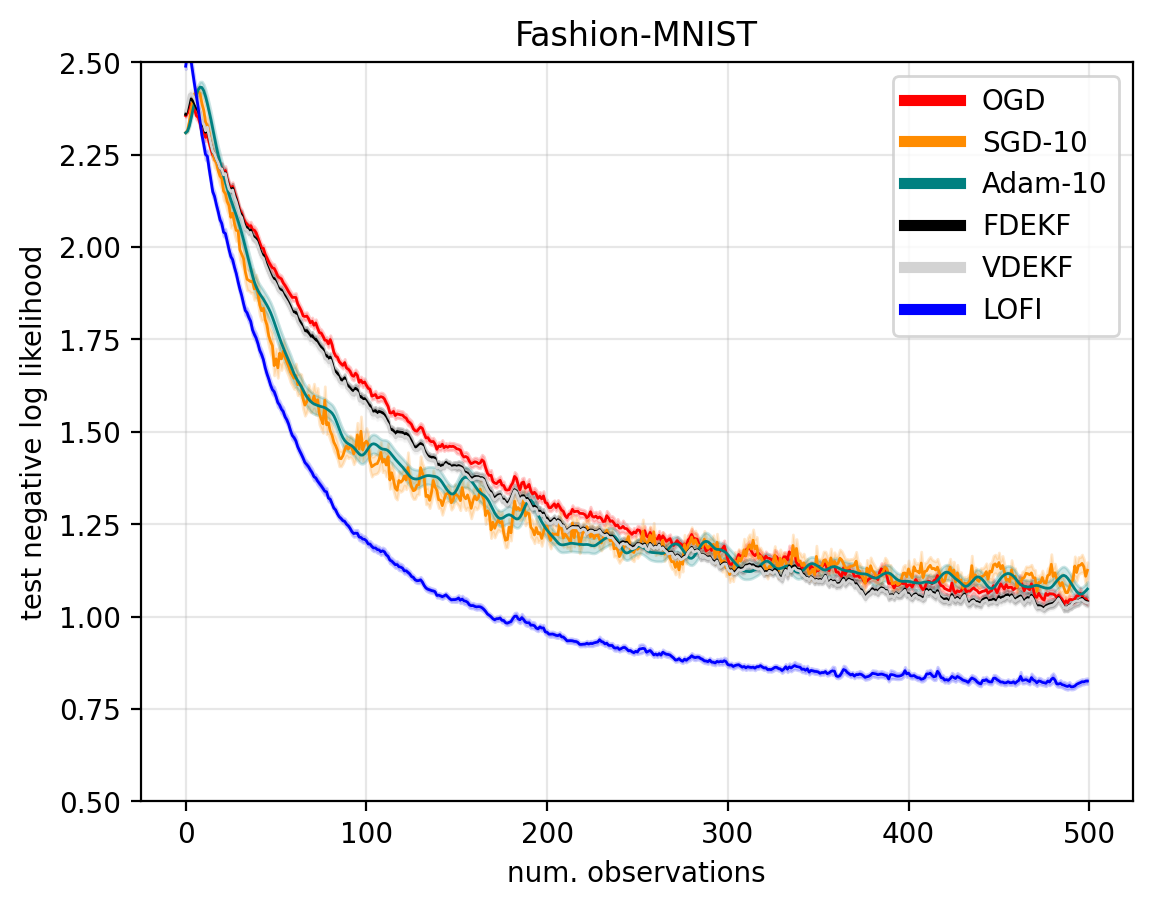

In [22]:
fig, ax = plt.subplots()
for key, val in results_nll_st.items():
    mean, std = val['mean'], val['std']
    label, color = methods_st[key]
    ax.plot(mean, label=label, c=color, linewidth=1.0)
    ax.fill_between(
        jnp.arange(mean.shape[0]),
        mean - std / jnp.sqrt(n_iter),
        mean + std / jnp.sqrt(n_iter),
        alpha=0.2,
        color=color
    )
ax.set_xlabel('num. observations')
ax.set_ylabel('test negative log likelihood')
ax.set_ylim(0.5, 2.5)
ax.grid(alpha=0.3)
ax.set_title('Fashion-MNIST')
leg = ax.legend()
# change the line width for the legend
for line in leg.get_lines():
    line.set_linewidth(4.0)

fig.savefig(Path(path_st, 'stationary-mnist-clf-test-nll.pdf'), bbox_inches='tight')

## 1.2 LOFI Comparison

In [38]:
lofi_methods_st = {
    # 'lofi-1-spherical': 'LOFI-SPH-1',
    'lofi-5-spherical': ('LOFI-SPH-5', 'gold'),
    'lofi-10-spherical': ('LOFI-SPH-10', 'darkorange'),
    'lofi-20-spherical': ('LOFI-SPH-20', 'red'),
    'lofi-50-spherical': ('LOFI-SPH-50', 'darkred'),
    
    # 'lofi-1-diagonal': 'LOFI-DIAG-1',
    'lofi-5-diagonal': ('LOFI-DIAG-5', 'darkgreen'),
    'lofi-10-diagonal': ('LOFI-DIAG-10', 'deepskyblue'),
    'lofi-20-diagonal': ('LOFI-DIAG-20', 'darkviolet'),
    'lofi-50-diagonal': ('LOFI-DIAG-50', 'blue'),
}

n_iter = 100

In [42]:
path_st = Path(Path.cwd(), "output", "stationary")

lofi_results_miscl_st, lofi_results_nll_st = {}, {}
key = jr.PRNGKey(0)

for method in lofi_methods_st:
    key, *subkeys = jr.split(key, 3)
    with open(Path(path_st, f'{method}_miscl.pkl'), "rb") as f:
        curr_miscl = pickle.load(f)
        # Add vertical jitters
        curr_miscl = {
            "mean": curr_miscl["mean"] + 0.001 * jr.normal(subkeys[0], curr_miscl["mean"].shape),
            "std": curr_miscl["std"],
        }
    with open(Path(path_st, f'{method}_nll.pkl'), "rb") as f:
        curr_nll = pickle.load(f)
        # Add vertical jitters
        curr_nll = {
            "mean": curr_nll["mean"] + 0.01 * jr.normal(subkeys[1], curr_nll["mean"].shape),
            "std": curr_nll["std"],
        }
    lofi_results_miscl_st[method] = curr_miscl
    lofi_results_nll_st[method] = curr_nll

Misclassification Rate

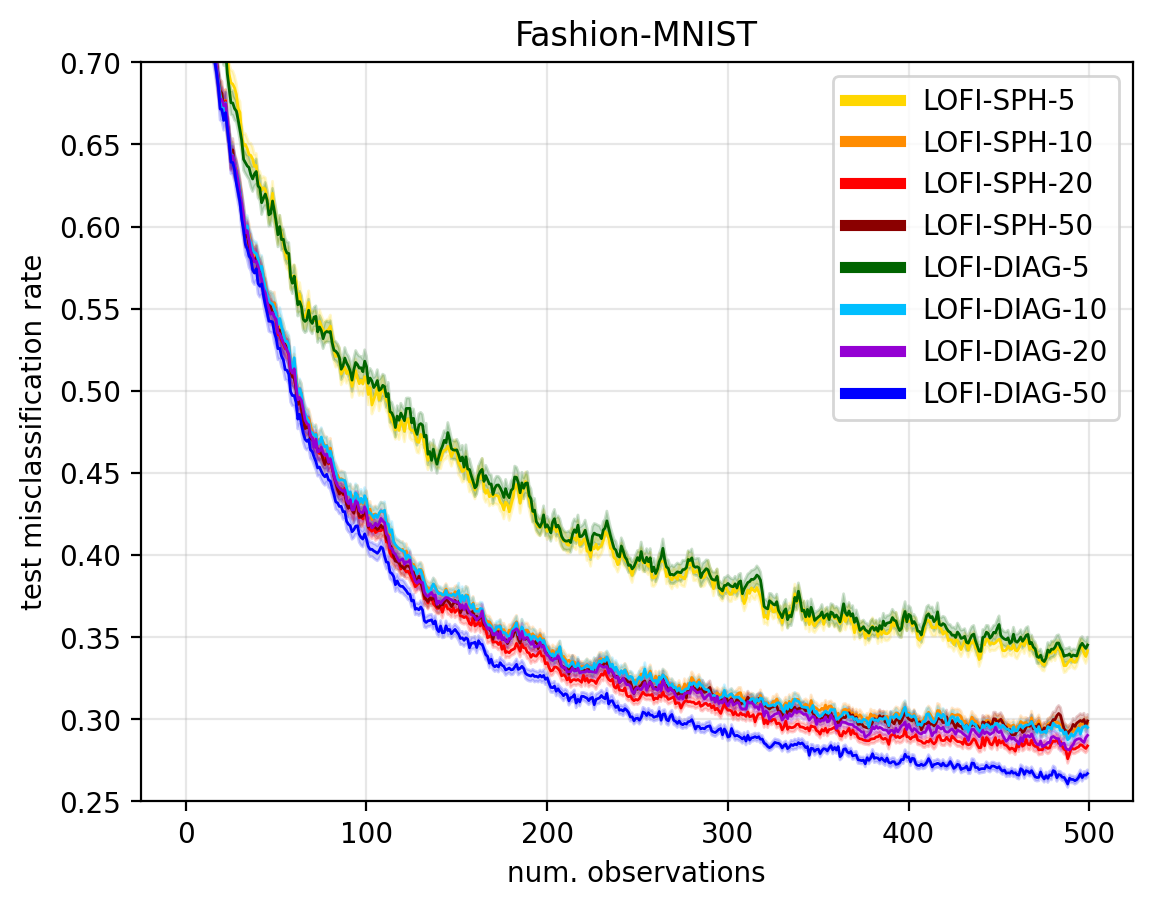

In [46]:
fig, ax = plt.subplots()
for key, val in lofi_results_miscl_st.items():
    mean, std = val['mean'], val['std']
    label, color = lofi_methods_st[key]
    ax.plot(mean, label=label, c=color, linewidth=1.0)
    ax.fill_between(
        jnp.arange(mean.shape[0]),
        mean - std / jnp.sqrt(n_iter),
        mean + std / jnp.sqrt(n_iter),
        alpha=0.2,
        color=color
    )
ax.set_xlabel('num. observations')
ax.set_ylabel('test misclassification rate')
ax.set_ylim(0.25, 0.7)
ax.grid(alpha=0.3)
ax.set_title('Fashion-MNIST')
leg = ax.legend()
# change the line width for the legend
for line in leg.get_lines():
    line.set_linewidth(4.0)

fig.savefig(Path(path_st, 'stationary-mnist-clf-test-miscl-lofi.pdf'), bbox_inches='tight')

Negative Log Likelihood

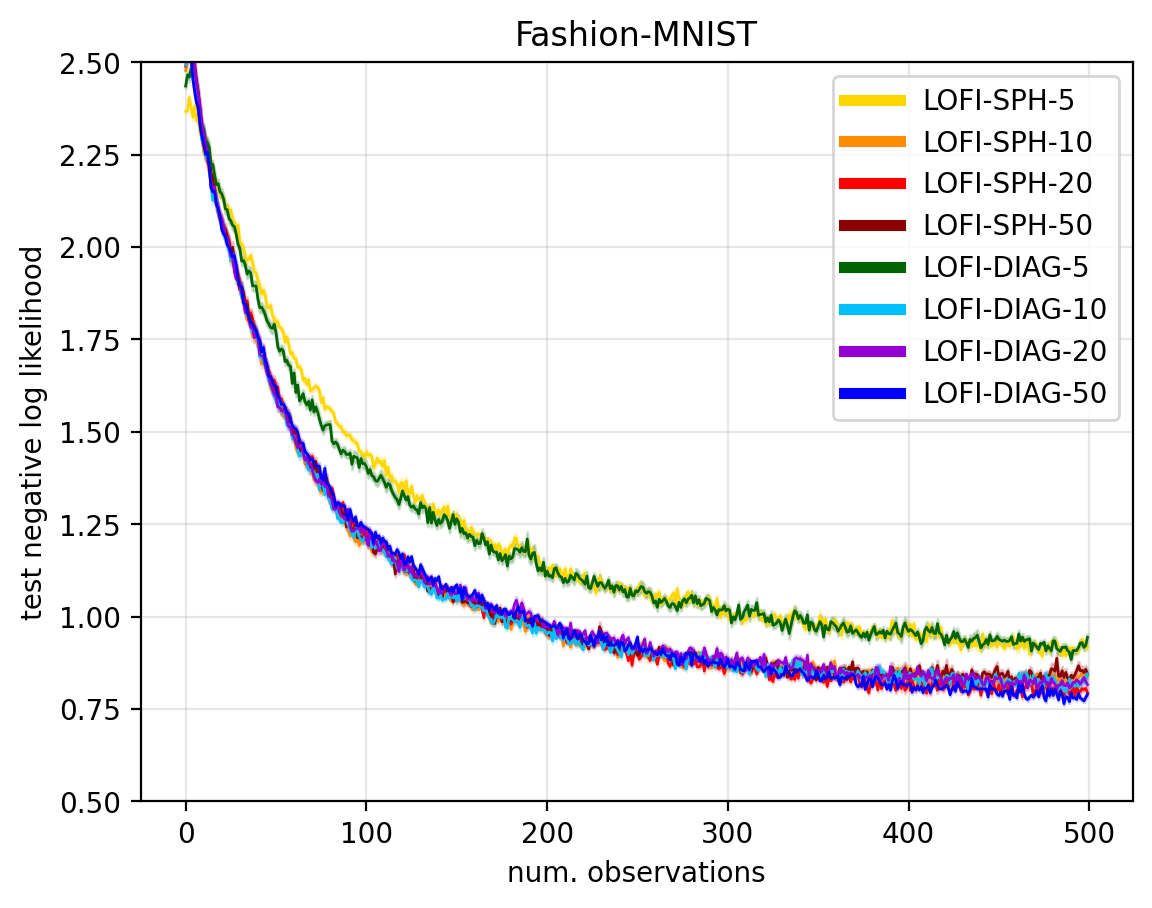

In [47]:
fig, ax = plt.subplots()
for key, val in lofi_results_nll_st.items():
    mean, std = val['mean'], val['std']
    label, color = lofi_methods_st[key]
    ax.plot(mean, label=label, c=color, linewidth=1.0)
    ax.fill_between(
        jnp.arange(mean.shape[0]),
        mean - std / jnp.sqrt(n_iter),
        mean + std / jnp.sqrt(n_iter),
        alpha=0.2,
        color=color
    )
ax.set_xlabel('num. observations')
ax.set_ylabel('test negative log likelihood')
ax.set_ylim(0.5, 2.5)
ax.grid(alpha=0.3)
ax.set_title('Fashion-MNIST')
leg = ax.legend()
# change the line width for the legend
for line in leg.get_lines():
    line.set_linewidth(4.0)

fig.savefig(Path(path_st, 'stationary-mnist-clf-test-nll-lofi.pdf'), bbox_inches='tight')

# 2. Nonstationary Permuted MNIST Classification

MLP with [100, 100, 10]

In [58]:
methods_nst = {
    'sgd-rb-1-sgd': 'OGD',
    # 'sgd-rb-5-sgd': 'SGD-5',
    'sgd-rb-10-sgd': 'SGD-10',
    
    # 'sgd-rb-1-adam': 'OGD (Adam)',
    # 'sgd-rb-5-adam': 'Adam-5',
    'sgd-rb-10-adam': 'Adam-10',
    
    'fdekf': 'FDEKF',
    'vdekf': 'VDEKF',
    
    # 'lofi-1-diagonal': 'LOFI-1',
    # 'lofi-5-diagonal': 'LOFI-5',
    'lofi-10-diagonal': 'LOFI-10',
    # 'lofi-1-spherical': 'LOFI-SPH-1',
    # 'lofi-5-spherical': 'LOFI-SPH-5',
    # 'lofi-10-spherical': 'LOFI-SPH-10',
}

n_iter = 10

In [59]:
path_nst_pmnist = Path(Path.cwd(), "output", "nonstationary", "permuted_mnist")

results_miscl_st, results_nll_st = {}, {}

for method in methods_nst:
    with open(Path(path_nst_pmnist, f'{method}_miscl.pkl'), "rb") as f:
        curr_miscl = pickle.load(f)
    with open(Path(path_nst_pmnist, f'{method}_nll.pkl'), "rb") as f:
        curr_nll = pickle.load(f)
    results_miscl_st[method] = curr_miscl
    results_nll_st[method] = curr_nll

In [60]:
boundaries = [i for i in range(300, (300*10)+1, 300)]

In [73]:
kernel_size = 1
kernel = jnp.ones((kernel_size,)) / kernel_size
convolve = lambda x: jnp.convolve(x, kernel, mode='same')

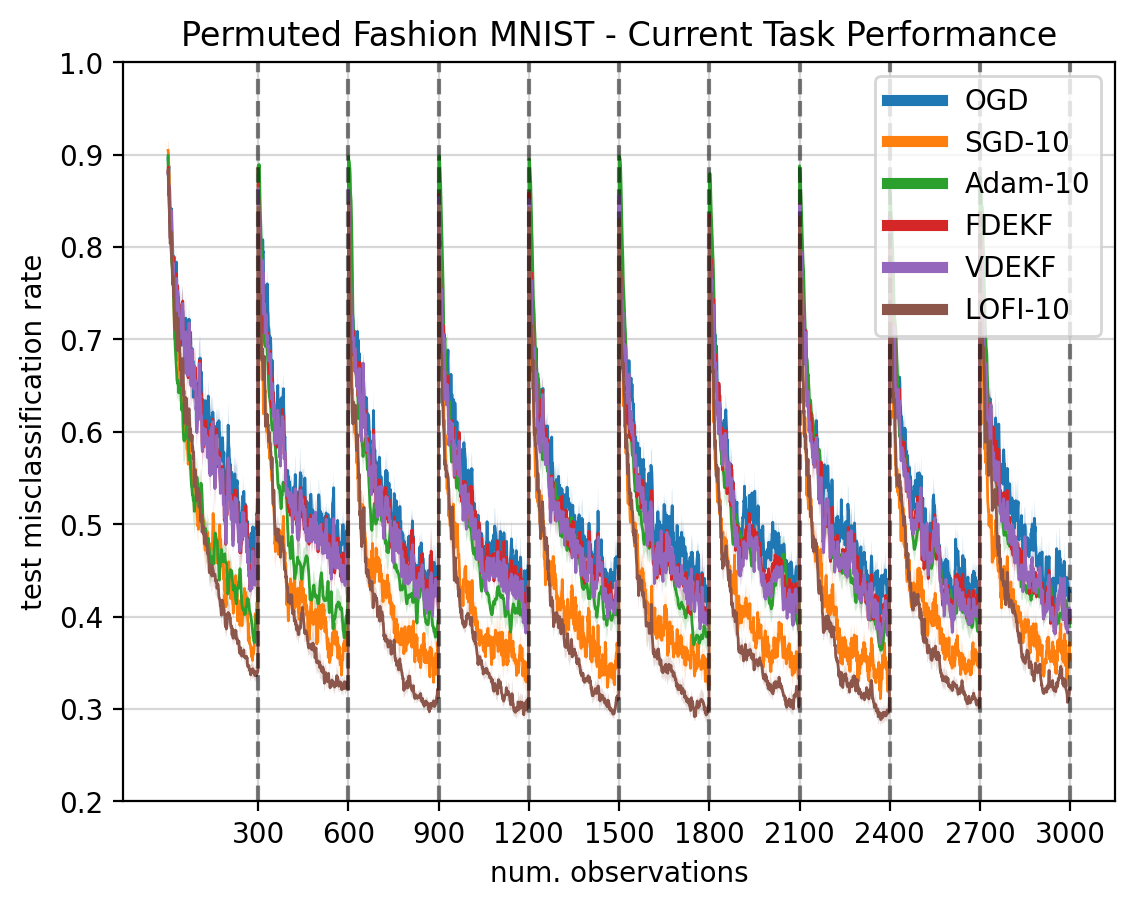

In [74]:
# TODO: add thicker lines for legends
fig, ax = plt.subplots()
for key, val in results_miscl_st.items():
    if key == 'offline_sgd':
        ax.axhline(y=val, color = 'gray', linestyle = '--', label=methods_nst[key]);
    else:
        ax.plot(convolve(val['current_mean']), label=methods_nst[key], linewidth=1.0)
        ax.fill_between(
            jnp.arange(val['current_mean'].shape[0]),
            convolve(val['current_mean']) - val['current_std']/jnp.sqrt(10),
            convolve(val['current_mean']) + val['current_std']/jnp.sqrt(10),
            alpha=0.2
        )
# Task boundaries
for b in boundaries:
    ax.axvline(x=b, color='k', linestyle='--', alpha=0.5)
ax.set_xticks(boundaries)
ax.set_xlabel('num. observations')
ax.set_ylabel('test misclassification rate');
ax.set_ylim(0.2, 1.0)
ax.set_title(f'Permuted Fashion MNIST - Current Task Performance')
ax.grid(alpha=0.5)
leg = ax.legend()
# change the line width for the legend
for line in leg.get_lines():
    line.set_linewidth(4.0)
fig.savefig(Path(path_nst_pmnist, 'nonstationary-pmnist-clf-curr-miscl.pdf'), bbox_inches='tight')

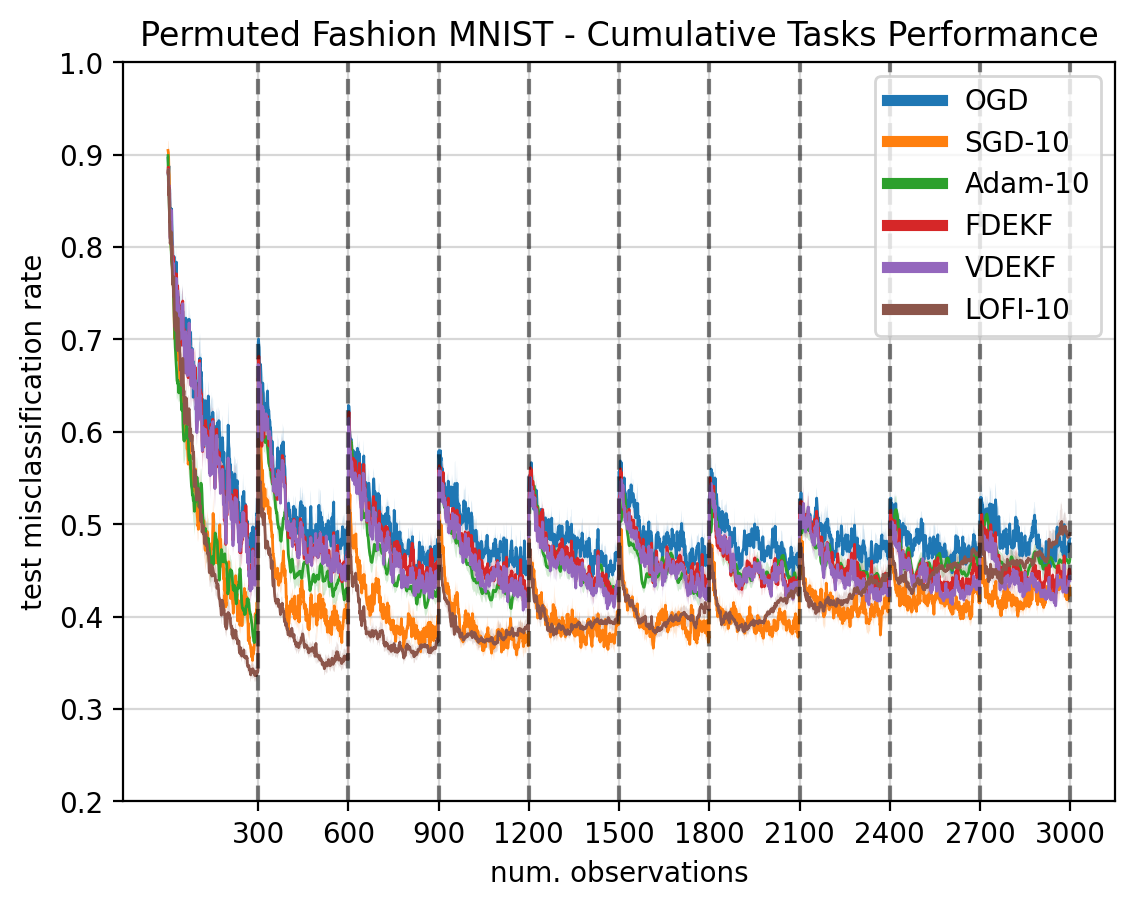

In [75]:
fig, ax = plt.subplots()
for key, value in results_miscl_st.items():
    if key == 'offline_sgd':
        ax.axhline(y=value, color = 'gray', linestyle = '--', label=methods_nst[key]);
    else:
        ax.plot(convolve(value['overall_mean']), label=methods_nst[key], linewidth=1.0)
        ax.fill_between(
            jnp.arange(value['overall_mean'].shape[0]),
            convolve(value['overall_mean']) - (value['overall_std'])/jnp.sqrt(10),
            convolve(value['overall_mean']) + (value['overall_std'])/jnp.sqrt(10),
            alpha=0.2
        )
# Task boundaries
for b in boundaries:
    ax.axvline(x=b, color='k', linestyle='--', alpha=0.5)
ax.set_xticks(boundaries)
ax.set_xlabel('num. observations')
ax.set_ylabel('test misclassification rate');
ax.set_ylim(0.2, 1.0)
ax.set_title(f'Permuted Fashion MNIST - Cumulative Tasks Performance')
ax.grid(alpha=0.5)
leg = ax.legend()
for line in leg.get_lines():
    line.set_linewidth(4.0)
fig.savefig(Path(path_nst_pmnist, 'nonstationary-pmnist-clf-cum-miscl.pdf'), bbox_inches='tight')

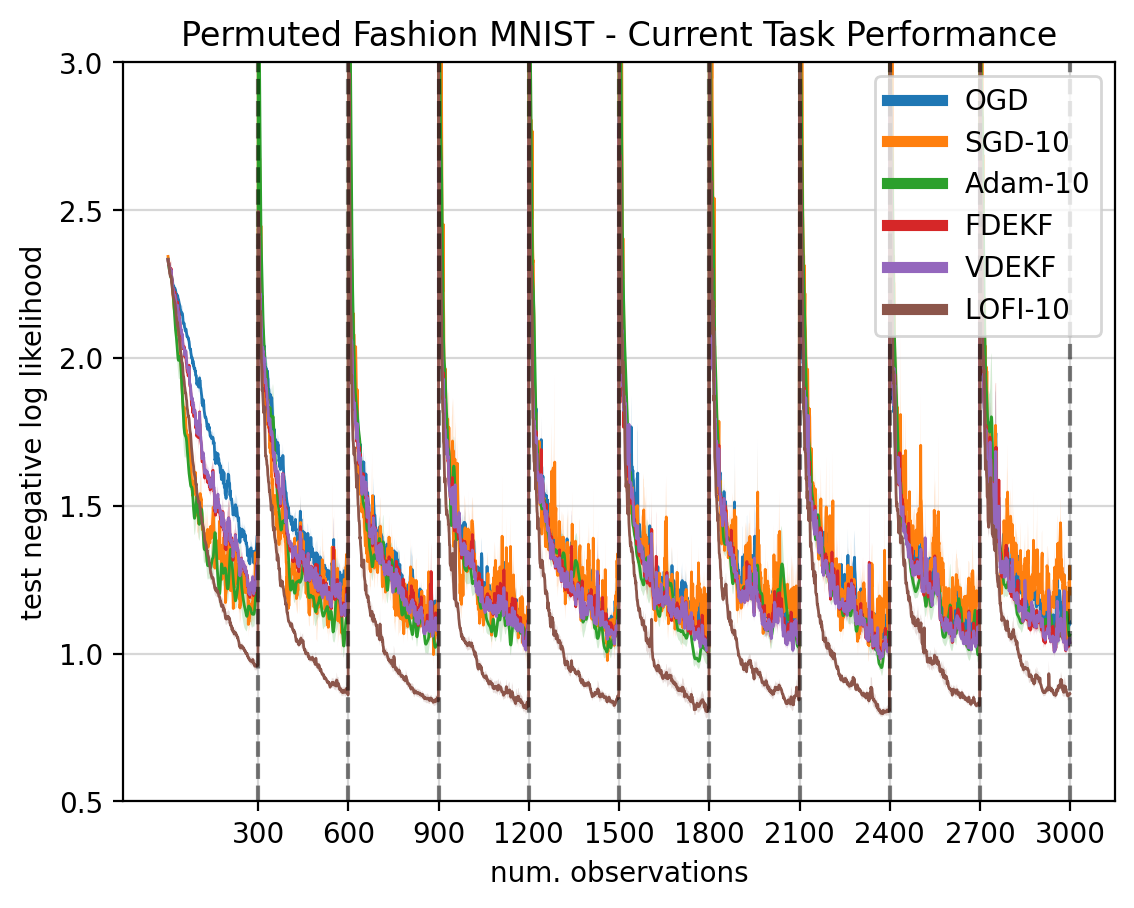

In [76]:
# TODO: add thicker lines for legends
fig, ax = plt.subplots()
for key, val in results_nll_st.items():
    if key == 'offline_sgd':
        ax.axhline(y=val, color = 'gray', linestyle = '--', label=methods_nst[key]);
    else:
        ax.plot(convolve(val['current_mean']), label=methods_nst[key], linewidth=1.0)
        ax.fill_between(
            jnp.arange(val['current_mean'].shape[0]),
            convolve(val['current_mean']) - val['current_std']/jnp.sqrt(10),
            convolve(val['current_mean']) + val['current_std']/jnp.sqrt(10),
            alpha=0.2
        )
# Task boundaries
for b in boundaries:
    ax.axvline(x=b, color='k', linestyle='--', alpha=0.5)
ax.set_xticks(boundaries)
ax.set_xlabel('num. observations')
ax.set_ylabel('test negative log likelihood');
ax.set_ylim(0.5, 3.0)
ax.set_title(f'Permuted Fashion MNIST - Current Task Performance')
ax.grid(alpha=0.5)
leg = ax.legend()
# change the line width for the legend
for line in leg.get_lines():
    line.set_linewidth(4.0)
fig.savefig(Path(path_nst_pmnist, 'nonstationary-pmnist-clf-curr-nll.pdf'), bbox_inches='tight')

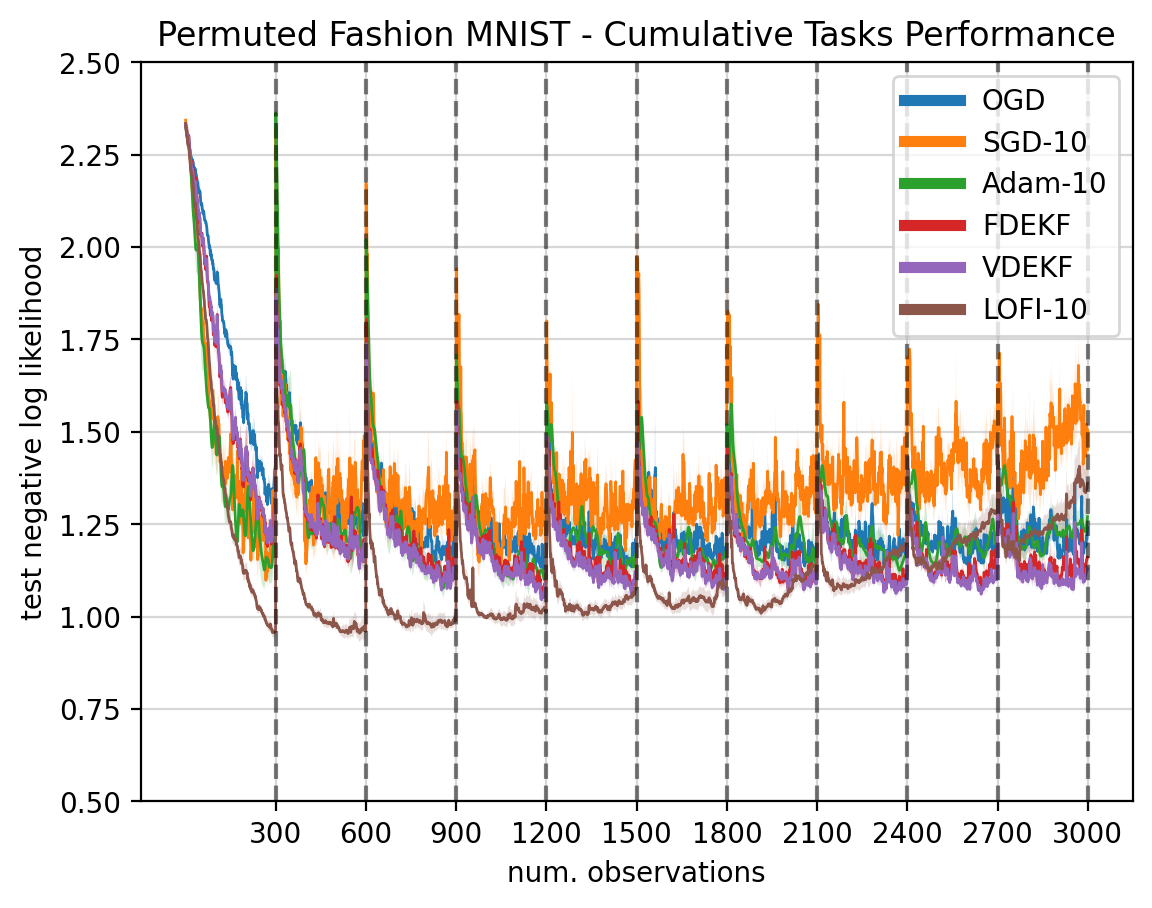

: 

In [77]:
fig, ax = plt.subplots()
for key, value in results_nll_st.items():
    if key == 'offline_sgd':
        ax.axhline(y=value, color = 'gray', linestyle = '--', label=methods_nst[key]);
    else:
        ax.plot(convolve(value['overall_mean']), label=methods_nst[key], linewidth=1.0)
        ax.fill_between(
            jnp.arange(value['overall_mean'].shape[0]),
            convolve(value['overall_mean']) - (value['overall_std'])/jnp.sqrt(10),
            convolve(value['overall_mean']) + (value['overall_std'])/jnp.sqrt(10),
            alpha=0.2
        )
# Task boundaries
for b in boundaries:
    ax.axvline(x=b, color='k', linestyle='--', alpha=0.5)
ax.set_xticks(boundaries)
ax.set_xlabel('num. observations')
ax.set_ylabel('test negative log likelihood');
ax.set_ylim(0.5, 2.5)
ax.set_title(f'Permuted Fashion MNIST - Cumulative Tasks Performance')
ax.grid(alpha=0.5)
leg = ax.legend()
for line in leg.get_lines():
    line.set_linewidth(4.0)
fig.savefig(Path(path_nst_pmnist, 'nonstationary-pmnist-clf-cum-nll.pdf'), bbox_inches='tight')

# 3. Nonstationary Split MNIST Classification

MLP with [500, 500, 1]

In [3]:
methods_nst_smnist = {
    'sgd-rb-1-sgd': 'OGD',
    # 'sgd-rb-5-sgd': 'SGD-5',
    'sgd-rb-10-sgd': 'SGD-10',
    
    # 'sgd-rb-1-adam': 'OGD (Adam)',
    # 'sgd-rb-5-adam': 'Adam-5',
    'sgd-rb-10-adam': 'Adam-10',
    
    'fdekf': 'FDEKF',
    'vdekf': 'VDEKF',
    
    # 'lofi-1-diagonal': 'LOFI-1',
    # 'lofi-5-diagonal': 'LOFI-5',
    'lofi-10-diagonal': 'LOFI-10',
    # 'lofi-1-spherical': 'LOFI-SPH-1',
    # 'lofi-5-spherical': 'LOFI-SPH-5',
    # 'lofi-10-spherical': 'LOFI-SPH-10',
}

n_iter_nst_smnist = 10

In [4]:
path_nst_smnist = Path(Path.cwd(), "output", "nonstationary", "split_mnist")

results_miscl_nst_smnist, results_nll_nst_smnist = {}, {}

for method in methods_nst_smnist:
    with open(Path(path_nst_smnist, f'{method}_miscl.pkl'), "rb") as f:
        curr_miscl = pickle.load(f)
    with open(Path(path_nst_smnist, f'{method}_nll.pkl'), "rb") as f:
        curr_nll = pickle.load(f)
    results_miscl_nst_smnist[method] = curr_miscl
    results_nll_nst_smnist[method] = curr_nll

In [11]:
ntrain_per_task_smnist = 300
boundaries_nst_smnist = [i for i in range(
    ntrain_per_task_smnist, (ntrain_per_task_smnist*5)+1, ntrain_per_task_smnist
)]

In [12]:
kernel_nst_smnist = jnp.ones((1,)) / 1
convolve_nst_smnist = lambda x: jnp.convolve(x, kernel_nst_smnist, mode='same')

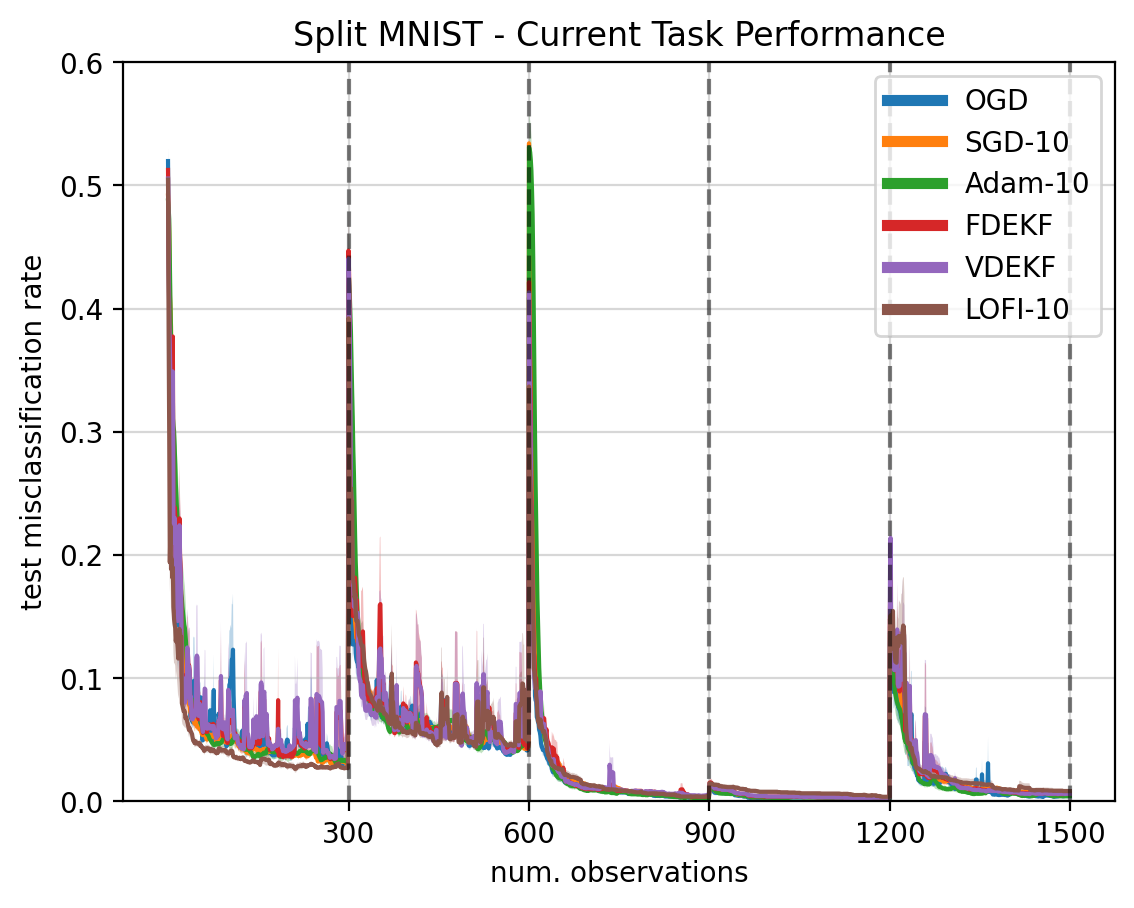

In [13]:
fig, ax = plt.subplots()
for key, val in results_miscl_nst_smnist.items():
    if key == 'offline_sgd':
        ax.axhline(y=val, color = 'gray', linestyle = '--', label=methods_nst_smnist[key]);
    else:
        ax.plot(convolve_nst_smnist(val['current_mean']), label=methods_nst_smnist[key])
        ax.fill_between(
            jnp.arange(val['current_mean'].shape[0]),
            convolve_nst_smnist(val['current_mean']) - val['current_std']/jnp.sqrt(n_iter_nst_smnist),
            convolve_nst_smnist(val['current_mean']) + val['current_std']/jnp.sqrt(n_iter_nst_smnist),
            alpha=0.3
        )
# Task boundaries
for b in boundaries_nst_smnist:
    ax.axvline(x=b, color='k', linestyle='--', alpha=0.5)
ax.set_xticks(boundaries_nst_smnist)
ax.set_xlabel('num. observations')
ax.set_ylabel('test misclassification rate');
ax.set_ylim(0.0, 0.6)
ax.set_title(f'Split MNIST - Current Task Performance')
ax.grid(alpha=0.5)
leg = ax.legend()
# change the line width for the legend
for line in leg.get_lines():
    line.set_linewidth(4.0)
fig.savefig(Path(path_nst_smnist, 'nonstationary-smnist-clf-curr-miscl.pdf'), bbox_inches='tight')

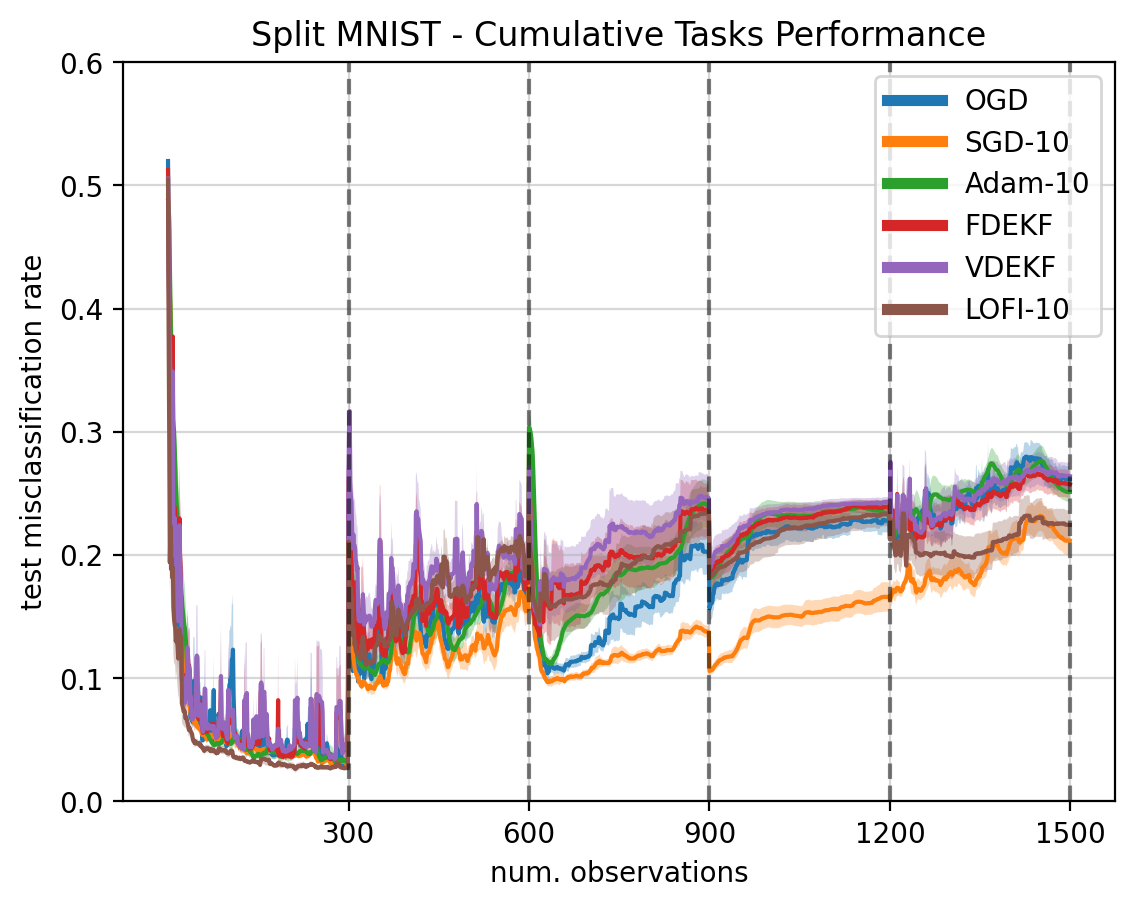

In [14]:
fig, ax = plt.subplots()
for key, value in results_miscl_nst_smnist.items():
    if key == 'offline_sgd':
        ax.axhline(y=value, color = 'gray', linestyle = '--', label=methods_nst_smnist[key]);
    else:
        ax.plot(convolve_nst_smnist(value['overall_mean']), label=methods_nst_smnist[key])
        ax.fill_between(
            jnp.arange(value['overall_mean'].shape[0]),
            convolve_nst_smnist(value['overall_mean']) - (value['overall_std'])/jnp.sqrt(n_iter_nst_smnist),
            convolve_nst_smnist(value['overall_mean']) + (value['overall_std'])/jnp.sqrt(n_iter_nst_smnist),
            alpha=0.3
        )
# Task boundaries
for b in boundaries_nst_smnist:
    ax.axvline(x=b, color='k', linestyle='--', alpha=0.5)
ax.set_xticks(boundaries_nst_smnist)
ax.set_xlabel('num. observations')
ax.set_ylabel('test misclassification rate');
ax.set_ylim(0.0, 0.6)
ax.set_title(f'Split MNIST - Cumulative Tasks Performance')
ax.grid(alpha=0.5)
leg = ax.legend()
for line in leg.get_lines():
    line.set_linewidth(4.0)
fig.savefig(Path(path_nst_smnist, 'nonstationary-smnist-clf-cum-miscl.pdf'), bbox_inches='tight')

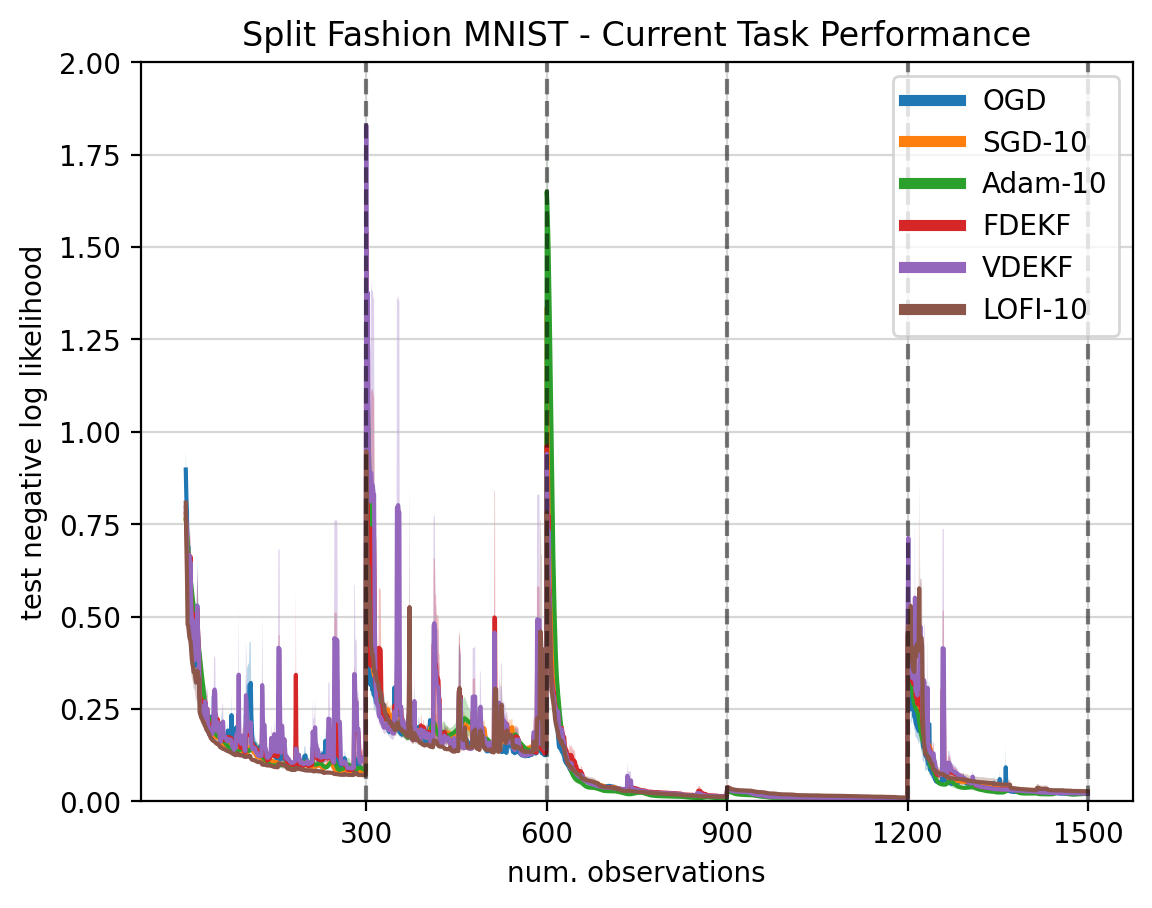

In [15]:
# Test Negative Log Likelihood (Current Task)
fig, ax = plt.subplots()
for key, val in results_nll_nst_smnist.items():
    if key == 'offline_sgd':
        ax.axhline(y=val, color = 'gray', linestyle = '--', label=methods_nst_smnist[key]);
    else:
        ax.plot(convolve_nst_smnist(val['current_mean']), label=methods_nst_smnist[key])
        ax.fill_between(
            jnp.arange(val['current_mean'].shape[0]),
            convolve_nst_smnist(val['current_mean']) - val['current_std']/jnp.sqrt(n_iter_nst_smnist),
            convolve_nst_smnist(val['current_mean']) + val['current_std']/jnp.sqrt(n_iter_nst_smnist),
            alpha=0.3
        )
# Task boundaries
for b in boundaries_nst_smnist:
    ax.axvline(x=b, color='k', linestyle='--', alpha=0.5)
ax.set_xticks(boundaries_nst_smnist)
ax.set_xlabel('num. observations')
ax.set_ylabel('test negative log likelihood');
ax.set_ylim(0.0, 2.0)
ax.set_title(f'Split Fashion MNIST - Current Task Performance')
ax.grid(alpha=0.5)
leg = ax.legend()
# change the line width for the legend
for line in leg.get_lines():
    line.set_linewidth(4.0)
fig.savefig(Path(path_nst_smnist, 'nonstationary-smnist-clf-curr-nll.pdf'), bbox_inches='tight')

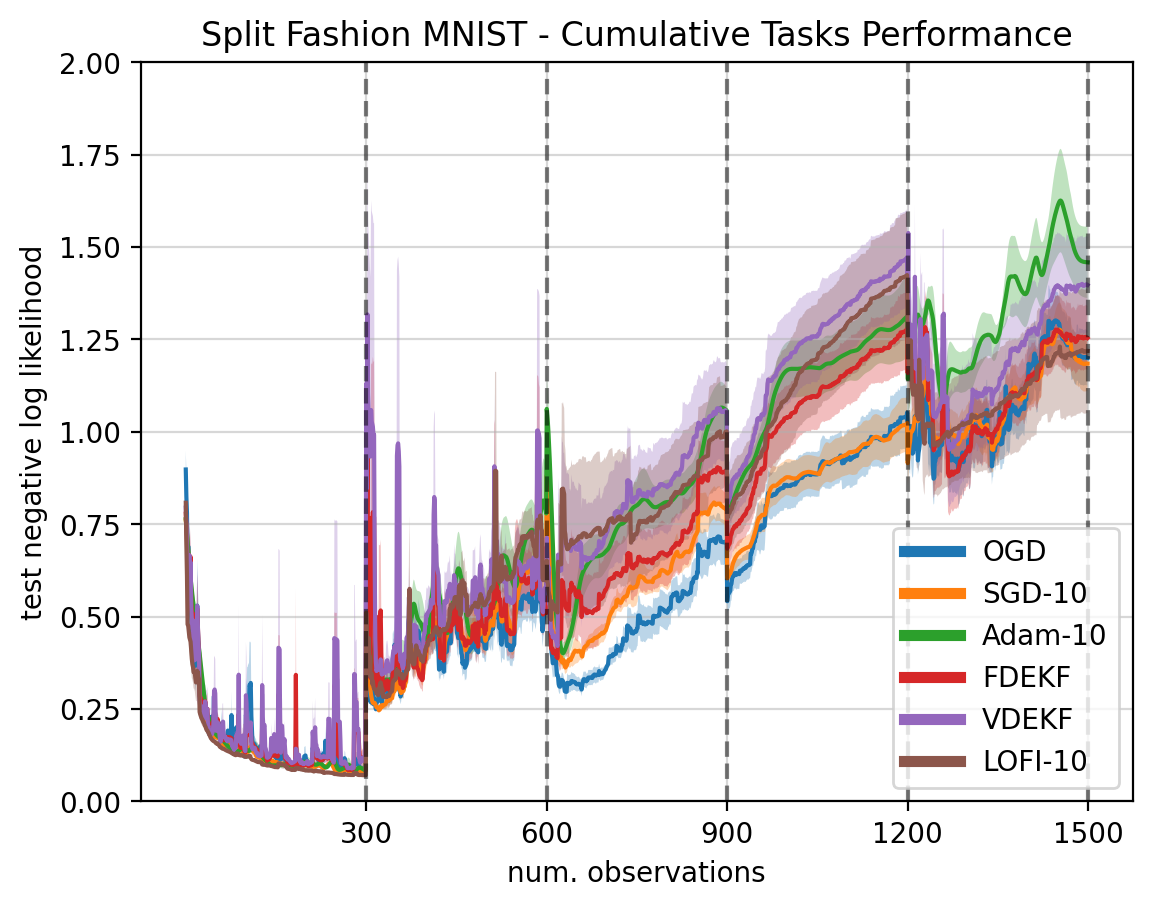

In [16]:
fig, ax = plt.subplots()
for key, value in results_nll_nst_smnist.items():
    if key == 'offline_sgd':
        ax.axhline(y=value, color = 'gray', linestyle = '--', label=methods_nst_smnist[key]);
    else:
        ax.plot(convolve_nst_smnist(value['overall_mean']), label=methods_nst_smnist[key])
        ax.fill_between(
            jnp.arange(value['overall_mean'].shape[0]),
            convolve_nst_smnist(value['overall_mean']) - (value['overall_std'])/jnp.sqrt(10),
            convolve_nst_smnist(value['overall_mean']) + (value['overall_std'])/jnp.sqrt(10),
            alpha=0.3
        )
# Task boundaries
for b in boundaries_nst_smnist:
    ax.axvline(x=b, color='k', linestyle='--', alpha=0.5)
ax.set_xticks(boundaries_nst_smnist)
ax.set_xlabel('num. observations')
ax.set_ylabel('test negative log likelihood');
ax.set_ylim(0.0, 2.0)
ax.set_title(f'Split Fashion MNIST - Cumulative Tasks Performance')
ax.grid(alpha=0.5)
leg = ax.legend()
for line in leg.get_lines():
    line.set_linewidth(4.0)
fig.savefig(Path(path_nst_smnist, 'nonstationary-smnist-clf-cum-nll.pdf'), bbox_inches='tight')

# 4. Nonstationary (Rotating) MNIST Classification

## 4.0 Sidenote: Problem with Existing Rotation

45.125343


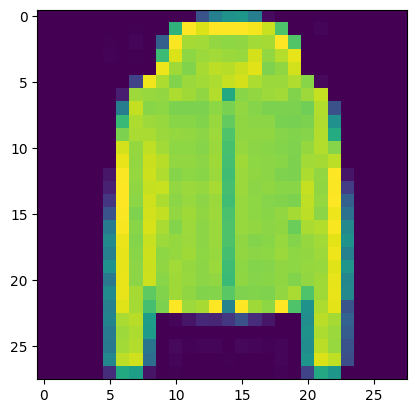

In [15]:
import matplotlib.pyplot as plt
import numpy as np

from rebayes.datasets import classification_data as data_utils
from rebayes.datasets import rotating_mnist_data as rmnist_data

dataset = data_utils.load_mnist_dataset(fashion=True) # load data
X, _ = dataset["train"]

n_steps = 360
min_angle, max_angle = 0.0, 360.0
gradually_rotating_angles = jnp.linspace(min_angle, max_angle, n_steps)

idx = 45
x = X[idx].reshape((28, 28))
plt.imshow(x)
print(gradually_rotating_angles[idx])

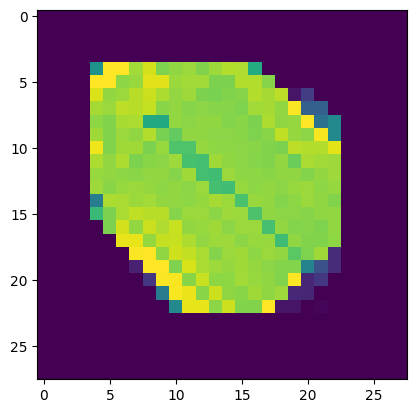

In [16]:
r_angle = gradually_rotating_angles[idx].item()

x_t1 = rmnist_data.rotate_mnist(np.array(x), r_angle)
plt.imshow(x_t1);

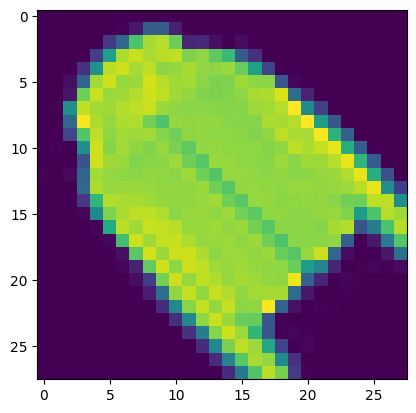

In [17]:
x_t2 = rmnist_data.rotate_mnist_jax(x, r_angle)
plt.imshow(x_t2);

## 4.1 Results (Gradually Rotating Eval Set)

In [14]:
methods_nst_rmnist = {
    # 'sgd-rb-1-sgd': ('OGD', 'red'),
    # 'sgd-rb-5-sgd': ('SGD-5', 'gold'),
    # 'sgd-rb-10-sgd': ('SGD-10', 'darkorange'),
    
    # 'sgd-rb-1-adam': ('Adam-1', 'olivedrab'),
    # 'sgd-rb-5-adam': ('Adam-5', 'darkgreen'),
    # 'sgd-rb-10-adam': ('Adam-10', 'teal'),
    
    # 'fdekf': ('FDEKF', 'black'),
    # 'vdekf': ('VDEKF', 'lightgray'),
    
    # 'lofi-5-diagonal': ('LOFI-5', 'aqua'),
    'lofi-10-diagonal': ('LOFI-10', 'blue'),
    # 'lofi-5-spherical': ('LOFI-SPH-5', 'deepskyblue'),
    # 'lofi-10-spherical': ('LOFI-SPH-10', 'blueviolet'),
}

n_iter_nst_smnist = 5

In [15]:
path_nst_rmnist_base = Path(Path.cwd(), "output", "nonstationary", "gradually_rotating_mnist")
path_nst_rmnist_grv = Path(path_nst_rmnist_base, "gradually_rotating_val")

results_miscl_nst_rmnist_grv, results_nll_nst_rmnist_grv = {}, {}

for method in methods_nst_rmnist:
    with open(Path(path_nst_rmnist_grv, f'{method}_miscl.pkl'), "rb") as f:
        curr_miscl = pickle.load(f)
    with open(Path(path_nst_rmnist_grv, f'{method}_nll.pkl'), "rb") as f:
        curr_nll = pickle.load(f)
    results_miscl_nst_rmnist_grv[method] = curr_miscl
    results_nll_nst_rmnist_grv[method] = curr_nll

Misclassification Rate

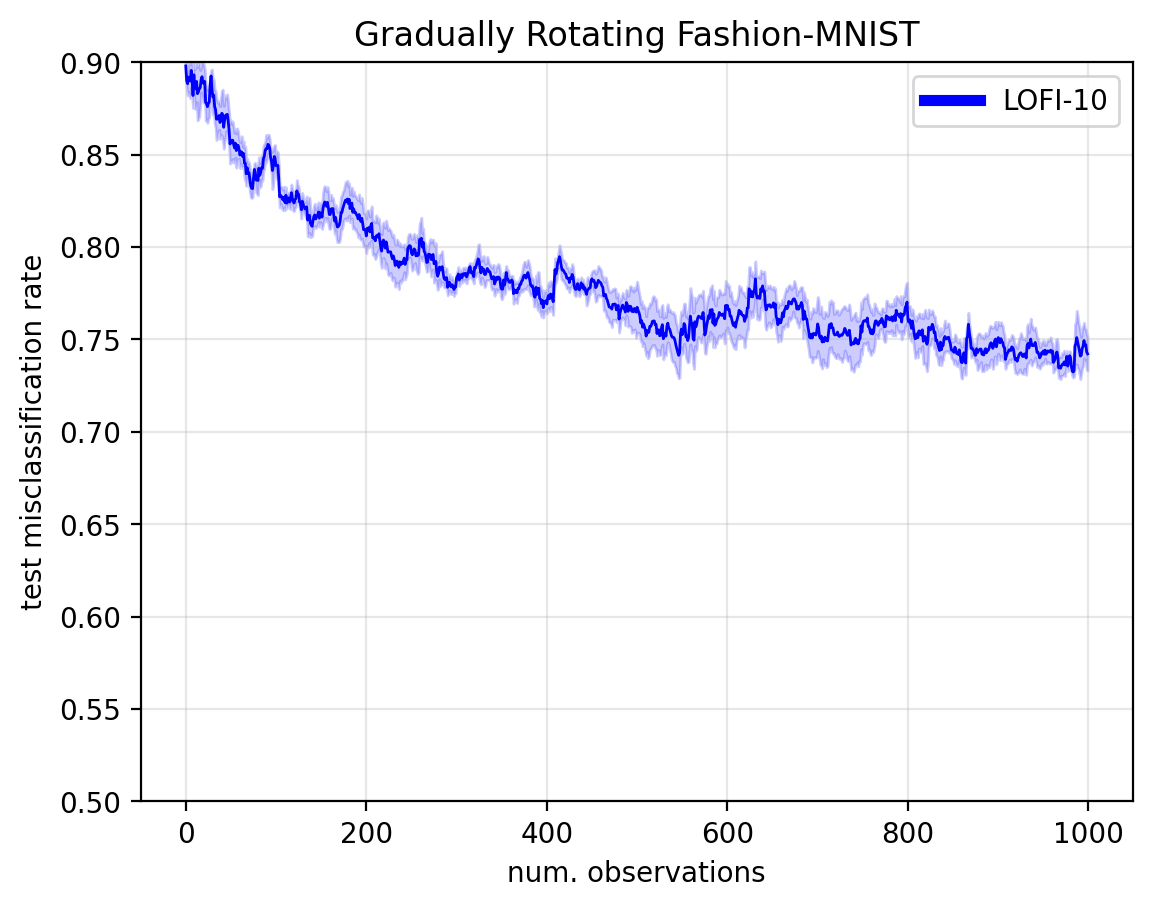

In [22]:
fig, ax = plt.subplots()
for key, val in results_miscl_nst_rmnist_grv.items():
    mean, std = val['mean'], val['std']
    label, color = methods_nst_rmnist[key]
    ax.plot(mean, label=label, c=color, linewidth=1.0)
    ax.fill_between(
        jnp.arange(mean.shape[0]),
        mean - std / jnp.sqrt(n_iter_nst_smnist),
        mean + std / jnp.sqrt(n_iter_nst_smnist),
        alpha=0.2,
        color=color
    )
ax.set_xlabel('num. observations')
ax.set_ylabel('test misclassification rate')
ax.set_ylim(0.5, 0.9)
ax.grid(alpha=0.3)
ax.set_title('Gradually Rotating Fashion-MNIST')
leg = ax.legend()
# change the line width for the legend
for line in leg.get_lines():
    line.set_linewidth(4.0)

fig.savefig(Path(path_nst_rmnist_grv, 'nonstationary-rmnist-grv-clf-test-miscl.pdf'), bbox_inches='tight')

Negative Log Likelihood

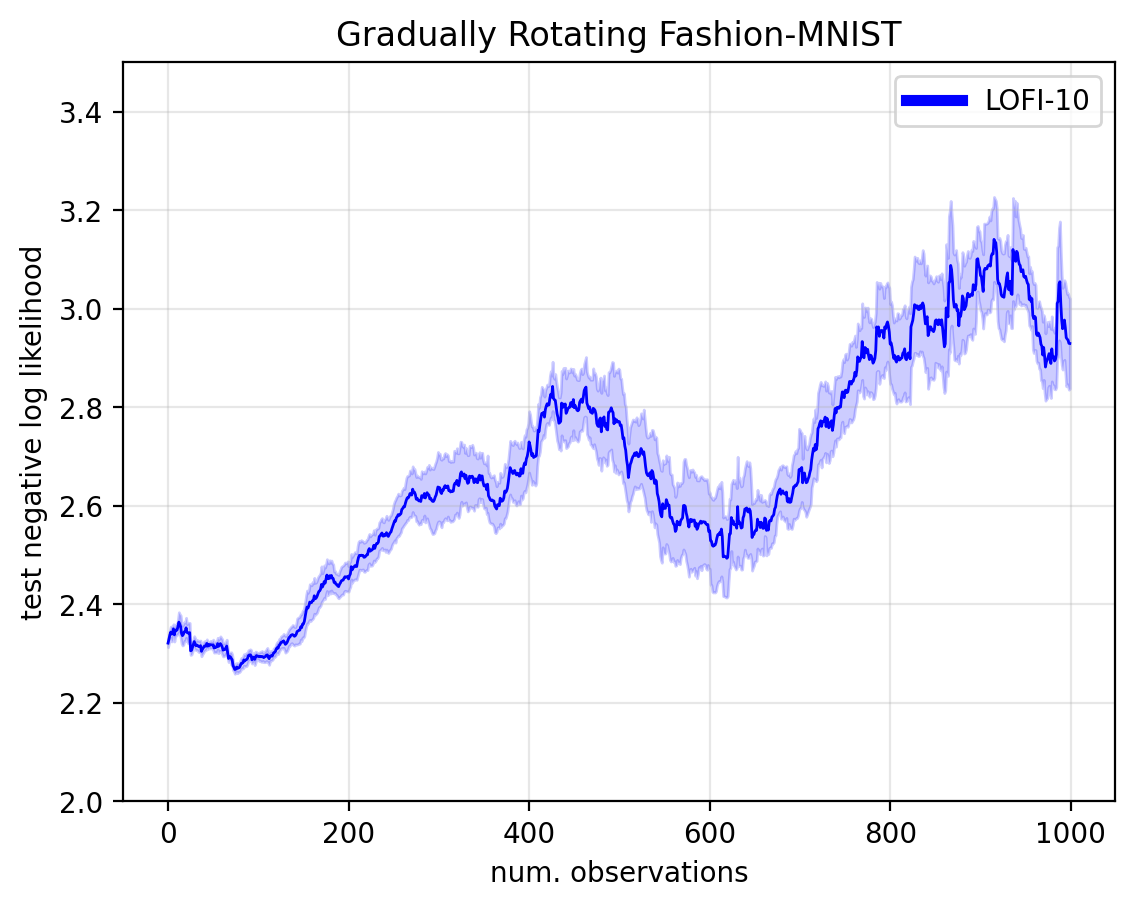

In [27]:
fig, ax = plt.subplots()
for key, val in results_nll_nst_rmnist_grv.items():
    mean, std = val['mean'], val['std']
    label, color = methods_nst_rmnist[key]
    ax.plot(mean, label=label, c=color, linewidth=1.0)
    ax.fill_between(
        jnp.arange(mean.shape[0]),
        mean - std / jnp.sqrt(n_iter_nst_smnist),
        mean + std / jnp.sqrt(n_iter_nst_smnist),
        alpha=0.2,
        color=color
    )
ax.set_xlabel('num. observations')
ax.set_ylabel('test negative log likelihood')
ax.set_ylim(2.0, 3.5)
ax.grid(alpha=0.3)
ax.set_title('Gradually Rotating Fashion-MNIST')
leg = ax.legend()
# change the line width for the legend
for line in leg.get_lines():
    line.set_linewidth(4.0)

fig.savefig(Path(path_nst_rmnist_grv, 'nonstationary-rmnist-grv-clf-test-nll.pdf'), bbox_inches='tight')

## 4.2 Results (Randomly Rotated Eval Set)

In [ ]:
path_nst_rmnist_base = Path(Path.cwd(), "output", "nonstationary", "gradually_rotating_mnist")
path_nst_rmnist_rrv = Path(path_nst_rmnist_base, "randomly_rotated_val")

results_miscl_nst_rmnist_rrv, results_nll_nst_rmnist_rrv = {}, {}

for method in methods_nst_rmnist:
    with open(Path(path_nst_rmnist_rrv, f'{method}_miscl.pkl'), "rb") as f:
        curr_miscl = pickle.load(f)
    with open(Path(path_nst_rmnist_rrv, f'{method}_nll.pkl'), "rb") as f:
        curr_nll = pickle.load(f)
    results_miscl_nst_rmnist_rrv[method] = curr_miscl
    results_nll_nst_rmnist_rrv[method] = curr_nll